# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Training and Visualizing a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris['data'][:, 2:]
y = iris['target']

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
#from graphviz import Source
#from sklearn.tree import export_graphviz

#export_graphviz(
    #tree_clf,
    #outfile=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    #feature_names=iris.feature_names[2:],
    #class_names=iris.target_names,
    #rounded=True,
    #filled=True
#)

#Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [3]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [4]:
tree_clf.predict([[5, 1.5]])

array([1])

# The CART Training Algorithm
- Scikit-Learn uses the **Classification And Regression Tree (CART)** algorithm to train Decision Trees (also called “growing” trees). 
- The idea is really quite simple: the algorithm first splits the training set in two subsets using a single **feature $k$** and a **threshold $t_k$** (e.g., “petal length ≤ 2.45 cm”).
    - It searches for the pair ($k$, $t_k$) that produces the purest subsets (weighted by their size).
- Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on, recursively.
- It stops recursing once it reaches the **maximum depth** (defined by the `max_depth` hyperparameter), or if it cannot find a split that will reduce impurity. 
- A few other hyperparameters (described in a moment) control additional stopping conditions (`min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, and `max_leaf_nodes`).

# Gini Impurity or Entropy?
- By default, the **Gini impurity** measure is used, but you can select the entropy impurity measure instead by setting the **criterion hyperparameter** to **"entropy"**.
- Most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default.

# Regularization Hypreparameters
- If Decision Trees are left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely, and most likely overfitting it. 
    - Such a model is often called a **nonparametric model** because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. 
    - In contrast, a **parametric model** such as a linear model has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting).
- To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called **regularization**.
- In sklearn, the maxium depth of a Decision Tree can be controlled by the `max_depth` hyperparameter.
- The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the Decision Tree: 
    - `min_samples_split` (the minimum number of samples a node must have before it can be split)
    - `min_samples_leaf` (the minimum number of samples a leaf node must have)
    - `min_weight_fraction_leaf` (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
    - `max_leaf_nodes` (maximum number of leaf nodes)
    - `max_features` (maximum number of features that are evaluated for splitting at each node)
- **Increasing `min_*` hyperparameters** or **reducing `max_*` hyperparameters** will regularize the model.

In [5]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=4)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Text(0.5, 1.0, 'min_sample_leaf = 4')

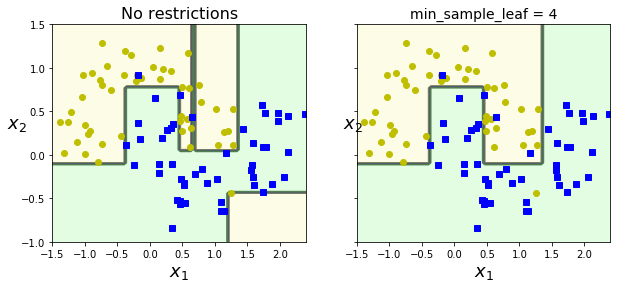

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_sample_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

- Other algorithms work by **first training the Decision Tree without restrictions**, then **pruning (deleting) unnecessary nodes**. 
    - A node whose children are all leaf nodes is considered **unnecessary** if the purity improvement it provides is **not statistically significant**. Standard statistical tests, such as the **χ2 test**, are used to estimate the probability that the improvement is purely the result of chance (which is called the null hypothesis). 
    - If this probability, called the pvalue, is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. 
- The pruning continues until all unnecessary nodes have been pruned.

# Regression
- Decision Trees are also capable of regression tasks. We use sklearn's **DecisionTreeRegressor** class.
- The CART algorithm works mostly the same way as for classification, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that **minimizes the MSE**.
- Prediction is the **average value** of all samples in the same leaf.
- Just as in classification tasks, Decision Trees are prone to overfit in regression tasks. So we **regularize hyperparameters** when needed.

In [7]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1)/10

In [8]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

- Regularize hyperparameters for regression.

Text(0.5, 1.0, 'min_samples_leaf = 10')

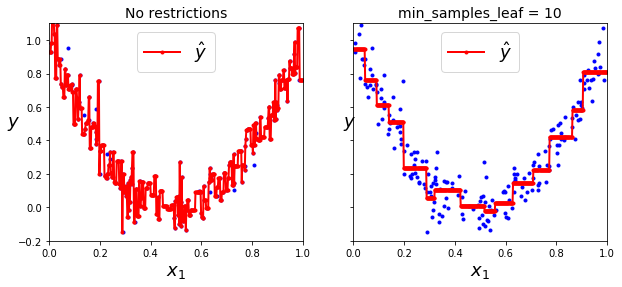

In [9]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1,1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred1, 'r.-', linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred2, 'r.-', linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("min_samples_leaf = {}".format(tree_reg2.min_samples_leaf), fontsize=14)

# Instability of Decision Trees
- Decision Trees are versatile and powerful, but they are sensitive to small variations in the training data.
    - E.g. Since Decision Trees have orthogonal decision boundaries, they are very sensitive to training set rotation. But we can limit this problem using PCA, which often results in a better orientation of the training data.
- Random Forests can limit this instability by averaging predictions over many trees.

# Exercises

## 7. Train and fine-tune a Decision Tree for the moons dataset

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    6.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [13]:
grid_search_cv.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [14]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## 8. Grow a forest

- Continuing the previous exercise, generate 1000 subsets of the training set, each containing 100 instances selected randomly.
    - We use sklearn's **ShuffuleSplit** class to do this.

In [15]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

- Train one Decision Tree on each subset, using the best hyperparameters found above.
- Evaluate these trees on the test set.

In [16]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accuracy_scores)

0.8054499999999999

- Now make a small change.
- For each test set instance, generate the predictions of the 1000 trees, and take the majority-vote prediction.

In [17]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)


for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [18]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [19]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872